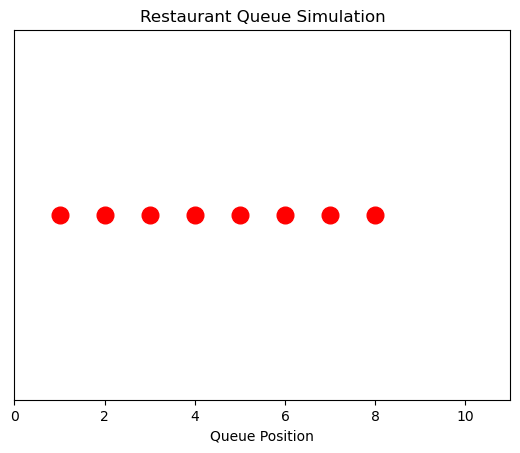

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random
from IPython.display import HTML

# Parameters
queue_capacity = 10         # Max people in queue visually
arrival_rate = 0.5          # Chance of a new customer arriving each time step
service_rate = 0.3          # Chance a customer gets served and leaves
dot_spacing = 1.0

# Initialize queue state
queue = []

# Set up the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(0, queue_capacity * dot_spacing + 1)
ax.set_ylim(0, 2)
ax.set_title("Restaurant Queue Simulation")
ax.set_xlabel("Queue Position")
ax.set_yticks([])

# Plotting queue dots
dots, = ax.plot([], [], 'ro', markersize=12)

def init():
    dots.set_data([], [])
    return dots,

def update(frame):
    global queue

    # Determine if a new customer arrives
    if len(queue) < queue_capacity and random.random() < arrival_rate:
        queue.append(frame)  # Frame ID as unique customer

    # Determine if the first customer leaves
    if queue and random.random() < service_rate:
        queue.pop(0)

    # Update dot positions
    x_positions = [i * dot_spacing + 1 for i in range(len(queue))]
    y_positions = [1] * len(queue)

    dots.set_data(x_positions, y_positions)
    return dots,

# Create animation
ani = animation.FuncAnimation(
    fig, update, init_func=init, frames=200, interval=500, blit=True
)

# Display the animation in Jupyter
HTML(ani.to_jshtml())
